In [1]:
import os

os.environ['API_KEY'] = "8ofL9LVF9Xv3q3yFVSXGzG9j0"
os.environ['API_KEY_SECRET'] = "wvq1MmPQXfq1FD31RJSsKQVsYhKbpJySpcvdSZ4pLfa20X2BZH"
os.environ['BEARER_TOKEN'] = "AAAAAAAAAAAAAAAAAAAAAF0hZgEAAAAAzu5SizJqQ8MlDcQMDC81XZUYtQ8%3DPpx5kBzGN0XAnoRuC4vHRnB6Fy55zgZj2iR2FAyoyKaDdn3dSN"

In [2]:
import requests
import os
import json
import APISecret #Remove this line to test

#print("hello")

#print(os.environ.get("API_KEY"))


def urlGen(search, maxTweets = 10):
    search = search + " lang:en"
    url = "https://api.twitter.com/2/tweets/search/recent"

    query_params = {'query': search,
                    'max_results': maxTweets,
                    'next_token': {},
                    'tweet.fields': 'public_metrics'}
    return url, query_params


def v2auth():
    #REPLACE THIS LINE WITH BEARER TOKEN TO TEST
    #ALSO REMOVE THE LINE "import APISecret"
    return os.environ.get("BEARER_TOKEN")

def requestHeaders(token):
    headers = {"Authorization": "Bearer {}".format(token)}
    return headers

def accessEndpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token
    response = requests.request("GET", url, headers=headers, params=params)
    #print(os.environ.get("BEARER_TOKEN"))
    print("Response: " + str(response.status_code))

    return response.json()

def callTwitter(search, max_results=20):
    bearer_token = v2auth()
    headers = requestHeaders(bearer_token)
    #search = "Kanye Pete"
    #max_results = 20
    url = urlGen(search, max_results)
    json_response = accessEndpoint(url[0], headers, url[1])
    return json_response


#jsonresponse = callTwitter("Kanye Pete Davidson beef", 40)
#HistDict = {}
#for item in jsonresponse["data"]:
#    if 'RT @' not in item["text"]:
#        try:
#            HistDict[item["text"][0:12]]
#        except:
#            HistDict[item["text"][0:12]] = 1
#            print(item["text"])
        
#print("done")
#print(jsonresponse)
#print(HistDict["hey"])


In [3]:
import nltk
from nltk.corpus import stopwords
import numpy as np
import copy


class tweetCleaner():
    def __init__(self, jsonObj):
        self.json = jsonObj
        self.cleanedJson = copy.copy(jsonObj)

    def lowerTweets(self):
        for item in self.cleanedJson['data']:
            item['text'] = item['text'].lower()

    def removeLinks(self):
        for item in self.cleanedJson['data']:
            tweetText = item['text']
            textArr = tweetText.split(' ')
            for word in textArr:
                if 'http' in word:
                    textArr.remove(word)
            newText = ' '.join(textArr)
            item['text'] = newText

    def removeRepeats(self):
        repeatArray = np.array([])
        myCopy = copy.copy(self.cleanedJson['data'])
        for item in myCopy:
            if ('rt @' in item['text']):
                self.cleanedJson["data"].remove(item)
            elif item['text'] in repeatArray:
                self.cleanedJson["data"].remove(item)
            else:
                repeatArray = np.append(repeatArray, item["text"])

    def removeStopWords(self):
        nltk.download('stopwords')
        stopWords = stopwords.words('english')
        for item in self.cleanedJson["data"]:
            tweetText = item['text']
            textArr = tweetText.split(' ')
            for word in textArr:
                if word in stopWords:
                    textArr.remove(word)
            newText = ' '.join(textArr)
            item['text'] = newText

    def prepTweets(self):
        self.lowerTweets()
        self.removeLinks()
        self.removeRepeats()
        self.removeStopWords()



json = callTwitter("Kanye Pete Davidson beef", 100)
g = tweetCleaner(json)

g.prepTweets()
for item in g.cleanedJson['data']:
    print(item['text'])


print("done")

Response: 200
charlamagne tha god claims there's 'big' reason kanye west beef pete davidson -- via @hiphopdx
order popular...you be brain dead. 

most people brain dead, if not-then average person can't relate to you-or even understand you're saying. 

#kakistocracy
kanye west snl can't seem get along the latest chapter ye's obsessive beef pete davidson gets
@digital_aids this mean mgk now part the pete davidson vs kanye beef?
@cory_4 @xxl jake paul beef pete davidson kanye beef pete davidson. jake wants see kanye beat pete's ass.
#petedavidson photographed drenched blood shooting new movie home amid beef kanye
jake paul offers pete davidson kanye west big money ‘settle beef like men’ #snl #petedavidson #kanyewest
monsters &amp; critics: jake paul offers pete davidson kanye west big money ‘settle beef like men’ #crime #news
, is the way men settle things unless are much a sniveling dog live the 14th century. the 21st.
we longer time you.
we need boldly go asshats like you are
#jakepaul

C:\Users\brand\AppData\Local\Temp/ipykernel_3596/1849496929.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif item['text'] in repeatArray:
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import pandas as pd

textList = []
likeCounts = []

for item in g.cleanedJson['data']:
    #print(item['text'])
    textList.append(item['text'])
    likeCounts.append(item['public_metrics']['like_count'])

data = {'text': textList, 'likeCounts': likeCounts}

df = pd.DataFrame(data)
df

,text,likeCounts
0,charlamagne tha god claims there's 'big' reaso...,0
1,order popular...you be brain dead. \n\nmost pe...,0
2,kanye west snl can't seem get along the latest...,0
3,@digital_aids this mean mgk now part the pete ...,0
4,@cory_4 @xxl jake paul beef pete davidson kany...,0
5,#petedavidson photographed drenched blood shoo...,0
6,jake paul offers pete davidson kanye west big ...,0
7,monsters &amp; critics: jake paul offers pete ...,0
8,", is the way men settle things unless are much...",1
9,#jakepaul upped ante #petedavidson #kanyewest ...,0


In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('vader_lexicon')

tweets = df['text']

sid = SentimentIntensityAnalyzer()

scores = []

for tweet in tweets:
    score=sid.polarity_scores(tweet)
    scores.append(score['compound'])
    print(tweet,score, '\n')
    


charlamagne tha god claims there's 'big' reason kanye west beef pete davidson -- via @hiphopdx {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.2732} 

order popular...you be brain dead. 

most people brain dead, if not-then average person can't relate to you-or even understand you're saying. 

#kakistocracy {'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'compound': -0.8625} 

kanye west snl can't seem get along the latest chapter ye's obsessive beef pete davidson gets {'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'compound': -0.2263} 

@digital_aids this mean mgk now part the pete davidson vs kanye beef? {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

@cory_4 @xxl jake paul beef pete davidson kanye beef pete davidson. jake wants see kanye beat pete's ass. {'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.5423} 

#petedavidson photographed drenched blood shooting new movie home amid beef kanye {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 

jake paul offers pete davidson

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
df['sentiment_score'] = scores
df

,text,likeCounts,sentiment_score
0,charlamagne tha god claims there's 'big' reaso...,0,0.2732
1,order popular...you be brain dead. \n\nmost pe...,0,-0.8625
2,kanye west snl can't seem get along the latest...,0,-0.2263
3,@digital_aids this mean mgk now part the pete ...,0,0.0000
4,@cory_4 @xxl jake paul beef pete davidson kany...,0,-0.5423
5,#petedavidson photographed drenched blood shoo...,0,0.0000
6,jake paul offers pete davidson kanye west big ...,0,0.3612
7,monsters &amp; critics: jake paul offers pete ...,0,0.0772
8,", is the way men settle things unless are much...",1,0.6124
9,#jakepaul upped ante #petedavidson #kanyewest ...,0,-0.2732


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 

vec = CountVectorizer(stop_words = 'english')

counts = vec.fit_transform(df['text'])

count_df=pd.DataFrame(counts.toarray(), columns = vec.get_feature_names())
df= pd.concat((df, count_df), axis = 1)
df


,text,likeCounts,sentiment_score,14th,21st,60,affected,amid,amp,ante,...,upped,video,vs,wants,way,west,worst,xxl,ye,ynhkzacpzm
0,charlamagne tha god claims there's 'big' reaso...,0,0.2732,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,order popular...you be brain dead. \n\nmost pe...,0,-0.8625,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,kanye west snl can't seem get along the latest...,0,-0.2263,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,@digital_aids this mean mgk now part the pete ...,0,0.0000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,@cory_4 @xxl jake paul beef pete davidson kany...,0,-0.5423,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,#petedavidson photographed drenched blood shoo...,0,0.0000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,jake paul offers pete davidson kanye west big ...,0,0.3612,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,monsters &amp; critics: jake paul offers pete ...,0,0.0772,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8,", is the way men settle things unless are much...",1,0.6124,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,#jakepaul upped ante #petedavidson #kanyewest ...,0,-0.2732,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


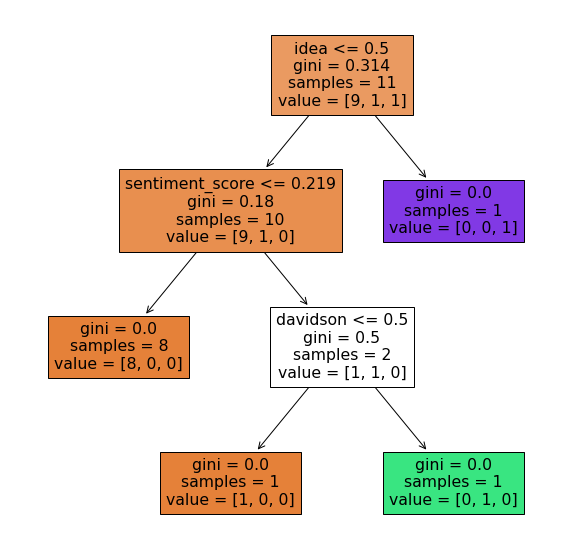

0.9375


In [47]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


X = df.drop(['likeCounts', 'text'], axis=1)
y = df['likeCounts']

def fit_tree(X, y, d):
    T = tree.DecisionTreeClassifier(max_depth=d)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
    T.fit(X_train, y_train)
    return T

T = fit_tree(X, y, 20)

fig, ax = plt.subplots(1, figsize = (10, 10))
p = tree.plot_tree (T, filled = True, feature_names = X.columns)
plt.show()

T = fit_tree(X, y, d=20)
print(T.score(X,y))